      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null 

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


----------------------------------------------------------------------------------------------------


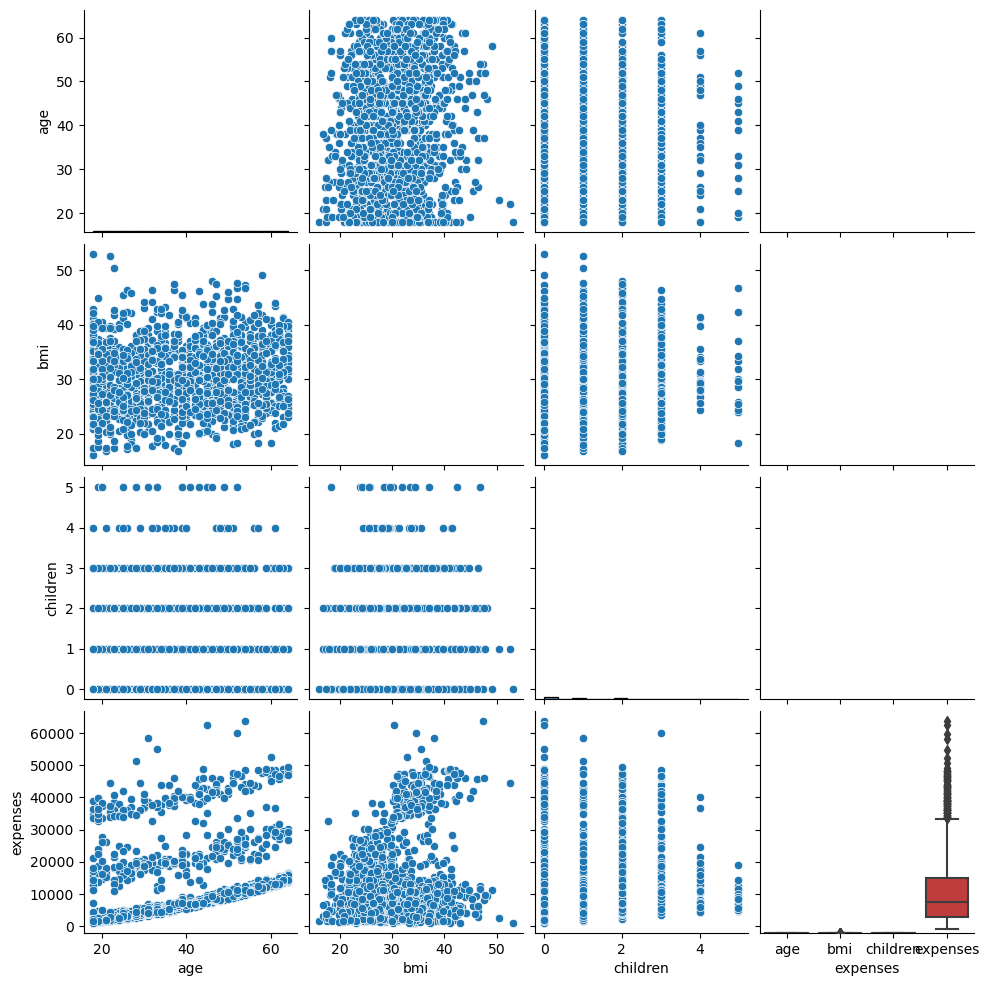

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Step-1 : Business Problem Undestanding

# This project is about the insurance expenses depending on the many factors(input variables) as age of the person, 
# gender, body mass index(bmi), the person have how many childrens, is he smoker or not, and his region of residence.

# We have to identify that for how much insurence expenses will be there depending on the independent variables , means we have to identify the relation between expenses and input variables.


# Step-2 : Data Understanding

# We have to uderstand that how many input variables are there which is the output variable and how many continous, discrete categorical, 
# discrete numerical variables are there in dataset, we have to seperate them.
# Is there any wrong data is there in columns?
# How many unique values are there in each column?
# and so on...


df = pd.read_excel("insurance.xlsx")
print(df)
print("-"*100)

df["age"].value_counts().sum()
df["sex"].value_counts()
df["bmi"].value_counts()
df["children"].value_counts()
df["smoker"].value_counts()
df["region"].value_counts()

df["age"].unique()
df["sex"].unique()
df["bmi"].unique()
df["children"].unique()
df["smoker"].unique()
df["region"].unique()

df.info()
print("-"*100)

# Exploratory Data Analysis:
# we have continous, discrete categorical, discrete numerical variables are there in dataset, we have to seperate them.

continous_vars = ["age","bmi","expenses"]
discrete_categoricals = ["sex","smoker","region"]
discrete_count = ["children"]

df.describe()
print("-"*100)

print(df[continous_vars].describe())
print("-"*100)

print(df[discrete_categoricals].describe())
print("-"*100)

print(df[discrete_count].describe())
print("-"*100)

print(df[continous_vars].corr())
print("-"*100)

sns.pairplot(df)
print("-"*100)

sns.boxplot(df)
plt.show()



In [32]:
# Step-3 : Data Preprocessing

# Data Cleaning : 

print(df.isnull().sum())
print("-"*100)

print(df.duplicated().sum())  # ---> Here, we will get 1 duplicate record, so we should that duplicated record
print("-"*100)

print(df.drop_duplicates(inplace=True),df.shape)  #  ---> It will drop the duplicated record and print new total no. of records in dataset
                                               #  ---> inplace = True , this attribute re-arrange the index of recods after dropping records from dataset

# Note: once we drop the duplicated records from the dataset, after that whenever we reload the data if don't use the drop_duplicates() function also, we never get the duplicated records   

# Here we can observe that the 'region' column is not usefull for the model identification, So we should drop the 'region' column


df.drop('region',axis=1,inplace=True)
print(df)
print("-"*100)

# Data Wrangling : Here, In the dataset we have discrete categorical columns so we have to convert them into discrete count formate,
                       # So, by using the nominal(dummy) encoding we have to convert discrete categorical into discrete count.
    
# Encoding : 

# Encoding sex column
df["sex"].replace({"female":0,"male":1},inplace=True)  # ---> It will convert the female into 0 & male into 1 in sex column

# Encoding smoker column
df["smoker"].replace({"no":0,"yes":1},inplace=True)    # ---> It will convert the no into 0 & yes into 1 in smoker column

print(df)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64
----------------------------------------------------------------------------------------------------
1
----------------------------------------------------------------------------------------------------
None (1337, 7)
      age     sex   bmi  children smoker  expenses
0      19  female  27.9         0    yes  16884.92
1      18    male  33.8         1     no   1725.55
2      28    male  33.0         3     no   4449.46
3      33    male  22.7         0     no  21984.47
4      32    male  28.9         0     no   3866.86
...   ...     ...   ...       ...    ...       ...
1333   50    male  31.0         3     no  10600.55
1334   18  female  31.9         0     no   2205.98
1335   18  female  36.9         0     no   1629.83
1336   21  female  25.8         0     no   2007.95
1337   61  female  29.1         0    yes  29141.36

[1337 rows x 6 columns]
---------------------------------

In [24]:
# Step-4 : Split the dataset into two parts train data & test data

X = df.drop("expenses" , axis = 1)
print(X)
print("-"*100)
y = df["expenses"]
print(y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=9)



      age  sex   bmi  children  smoker
0      19    0  27.9         0       1
1      18    1  33.8         1       0
2      28    1  33.0         3       0
3      33    1  22.7         0       0
4      32    1  28.9         0       0
...   ...  ...   ...       ...     ...
1333   50    1  31.0         3       0
1334   18    0  31.9         0       0
1335   18    0  36.9         0       0
1336   21    0  25.8         0       0
1337   61    0  29.1         0       1

[1337 rows x 5 columns]
----------------------------------------------------------------------------------------------------
0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1337, dtype: float64


In [33]:
# In Ridge Regression is similar to Lasso regression only we have to change Laaso with Ridge, Ridge regression has penalty in which alpha is there,
# the alpha is very important in model identification. So, we have to first findout the best alpha value for the model.
    
# To find best value of alpha, applying HyperparameterTuning for Lasso Regression:

from sklearn.model_selection import GridSearchCV    # GridSearchCV mean within the given list identify best value of cv

from sklearn.linear_model import Ridge
estimator = Ridge()

# parameters(alphas) & values
param_grid = {"alpha":list(range(1,100))}   # Here, alpha is key of dictionary(dict) having value as the list of 1 to 99(i.e.[1,2,...,98,99])
    
# Identifying the best value of the paramter(alpha) within the given range of values(i.e. here, 1 to 99) for the given data

model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring='r2')  # ---> Here, model_hp will collect the best alpha value
model_hp.fit(X_train,y_train)
model_hp.best_params_      # ---> It will give the best alpha value for best model identification

{'alpha': 1}

In [34]:
# Modelling : 

from sklearn.linear_model import Ridge
ridge_best = Ridge(1)

ridge_best.fit(X_train,y_train)

print("coefficients:",ridge_best.coef_)
print("-"*100)
print("intercept:",ridge_best.intercept_)

coefficients: [  264.4786592   -112.37962155   318.56350557   413.12069122
 23853.85951773]
----------------------------------------------------------------------------------------------------
intercept: -12131.383174500288


In [35]:
# Step-5  : Prediction : 

ypred_train = ridge_best.predict(X_train)
print("ypred_train:",ypred_train)
print("-"*100)

ypred_test = ridge_best.predict(X_test)
print("ypred_test:",ypred_test)
print("-"*100)

ypred_train: [17100.65787662 10271.58480587  5669.46410349 ... 14955.11502179
  7328.01806452 12815.15914381]
----------------------------------------------------------------------------------------------------
ypred_test: [13453.52329742 31353.23232938 24904.4551607   8458.0361147
  9569.55137858 30277.31340768 14468.71658645  9657.63534483
 26797.36707424  4700.17536178  2332.81896998 10078.00156292
 13159.87298582  3003.23560527 10670.08112397  7903.39329486
  6711.15862888 10889.45610754 27295.41709637 12206.91569689
  9174.14688409  6913.59741909  4114.75086914 15385.10909463
  2396.53167109  4314.04012621 10294.03857813 11236.17939949
  7877.24295842  5540.1548748   1945.32096847  9130.70175848
 10436.10263559  -273.98384978 12446.72072066 16753.9831143
 11244.80967031 37171.76283176  2217.99420883 38170.71662508
  3779.37679369  5146.93657706  9680.87570667  9859.00604349
  3800.65623522 40189.50014599 31759.27654464 16094.62760734
  9303.59601836  4589.09569444 27721.2012404   

In [40]:
# Evalution : 

from sklearn.metrics import mean_absolute_error
MAE_train = mean_absolute_error(y_train,ypred_train)
print("MAE_train:",MAE_train)
MAE_test = mean_absolute_error(y_test,ypred_test)
print("MAE_test:",MAE_test)
print("-"*100)

from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train,ypred_train)
print("MSE_train:",MSE_train)
MSE_test = mean_squared_error(y_test,ypred_test)
print("MSE_test:",MSE_test)
print("-"*100)

RMSE_train = np.sqrt(MSE_train)
print("RMSE_train:",RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print("RMSE_test:",RMSE_test)
print("-"*100)

r2_train = ridge_best.score(X_train,y_train)
print("r2_train:",r2_train)
r2_test = ridge_best.score(X_test,y_test)
print("r2_test:",r2_test)
print("-"*100)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(ridge_best,X_train,y_train,cv=5)
print("Cross_validation_scores:",scores)
print("Cross_validation_score:",scores.mean())

MAE_train: 4194.950190384216
MAE_test: 4125.939474556911
----------------------------------------------------------------------------------------------------
MSE_train: 36537000.22866574
MSE_test: 37426796.97392914
----------------------------------------------------------------------------------------------------
RMSE_train: 6044.584371870885
RMSE_test: 6117.744435159836
----------------------------------------------------------------------------------------------------
r2_train: 0.7593639632162803
r2_test: 0.7008629672692221
----------------------------------------------------------------------------------------------------
Cross_validation_scores: [0.73675575 0.81624753 0.81694188 0.72850965 0.66889816]
Cross_validation_score: 0.753470595394454


In [49]:
# Step-6 : Final Model Selection

from sklearn.linear_model import Ridge
ridge_final = Ridge(1)

ridge_final.fit(X_train,y_train)

print("coefficients:",ridge_final.coef_)
print("intercept:",ridge_final.intercept_)
print("-"*100)

# predictions & evaluation on train data
ypred_train = ridge_final.predict(X_train)
print("ypred_train:",ypred_train)
print("-"*100)

r2_train = ridge_final.score(X_train,y_train)
print("r2_train:",r2_train)
print("-"*100)

scores = cross_val_score(ridge_final,X_train,y_train,cv=5)
print("cross_validation_score_train:",scores.mean())
print("="*100)

# predictions & evaluation on test data
ypred_test = ridge_final.predict(X_test)
print("ypred_test:",ypred_test)
print("-"*100)

r2_test = ridge_final.score(X_test,y_test)
print("r2_test:",r2_test)
print("-"*100)

scores = cross_val_score(ridge_final,X_test,y_test,cv=5)
print("cross_validation_score_test:",scores.mean())
print("="*100)


coefficients: [  264.4786592   -112.37962155   318.56350557   413.12069122
 23853.85951773]
intercept: -12131.383174500288
----------------------------------------------------------------------------------------------------
ypred_train: [17100.65787662 10271.58480587  5669.46410349 ... 14955.11502179
  7328.01806452 12815.15914381]
----------------------------------------------------------------------------------------------------
r2_train: 0.7593639632162803
----------------------------------------------------------------------------------------------------
cross_validation_score_train: 0.753470595394454
ypred_test: [13453.52329742 31353.23232938 24904.4551607   8458.0361147
  9569.55137858 30277.31340768 14468.71658645  9657.63534483
 26797.36707424  4700.17536178  2332.81896998 10078.00156292
 13159.87298582  3003.23560527 10670.08112397  7903.39329486
  6711.15862888 10889.45610754 27295.41709637 12206.91569689
  9174.14688409  6913.59741909  4114.75086914 15385.10909463
  2396.531

In [54]:
# Step-7 : Predictions on new data to test the model

new_data = {"age":35, "sex":"male", "bmi":31.4, "children":5, "smoker": "yes", "region":"southeast"}

df_test = pd.DataFrame(new_data,index=[0])
print(df_test)

# But we know that in model identification process the 'region' column is useless, it is dropped. 
# So we should drop 'region' column here, also while testing new data of client.

df_test.drop(["region"],axis=1,inplace= True)
print(df_test)
print("-"*100)

df_test["sex"].replace({"female":0, "male":1},inplace=True)
print(df_test)
print("-"*100)

df_test["smoker"].replace({"no":0, "yes":1},inplace=True)
print(df_test)
print("-"*100)

ypred_new_data = ridge_final.predict(df_test)
print("ypred_new_data:",ypred_new_data)


   age   sex   bmi  children smoker     region
0   35  male  31.4         5    yes  southeast
   age   sex   bmi  children smoker
0   35  male  31.4         5    yes
----------------------------------------------------------------------------------------------------
   age  sex   bmi  children smoker
0   35    1  31.4         5    yes
----------------------------------------------------------------------------------------------------
   age  sex   bmi  children  smoker
0   35    1  31.4         5       1
----------------------------------------------------------------------------------------------------
ypred_new_data: [32935.34732475]


In [55]:
# The identified model is as:

# ypred = 264.4786592*(age) + (-112.37962155)*(sex) + 318.56350557*(bmi) + 413.12069122*(children) + 23853.85951773*(smoker) + (-12131.383174500288)

ypred = 264.4786592*(35) + (-112.37962155)*(1) + 318.56350557*(31.4) + 413.12069122*(5) + 23853.85951773*(1) + (-12131.383174500288)
print("ypred:",ypred)

ypred: 32935.34732467771
